In [17]:
%pylab inline
from simulation import *
num_cores = multiprocessing.cpu_count() - 1
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import pickle, gzip
from palettable.colorbrewer.qualitative import Set1_5,Set1_7

with gzip.open('simulation_results_q.gz','rb') as f:
    results = pickle.load(f)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'colors', 'product', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [35]:
q_true = 2 # explore criteria values for q = 2 case
criteria = ['WAIC1','WAIC2','LOO','DIC1']


In [36]:
len(results[0])

5

In [37]:
# q_real q_assumed measure value

widedata = []
testvalues = defaultdict(partial(partial(defaultdict,list)))

for j,infolist in enumerate(results[q_true]):
     for result_set in infolist:
        # each item is a single set of 10000 replications (should be J of these)
        # omit the set of 1024 trajectories as it is not very interesting
        sim_data = []
        for test in criteria:
            # loop over the replications and collect the values
            for q,val in result_set[test].items():
                testvalues[test][(j,q)] += [val]



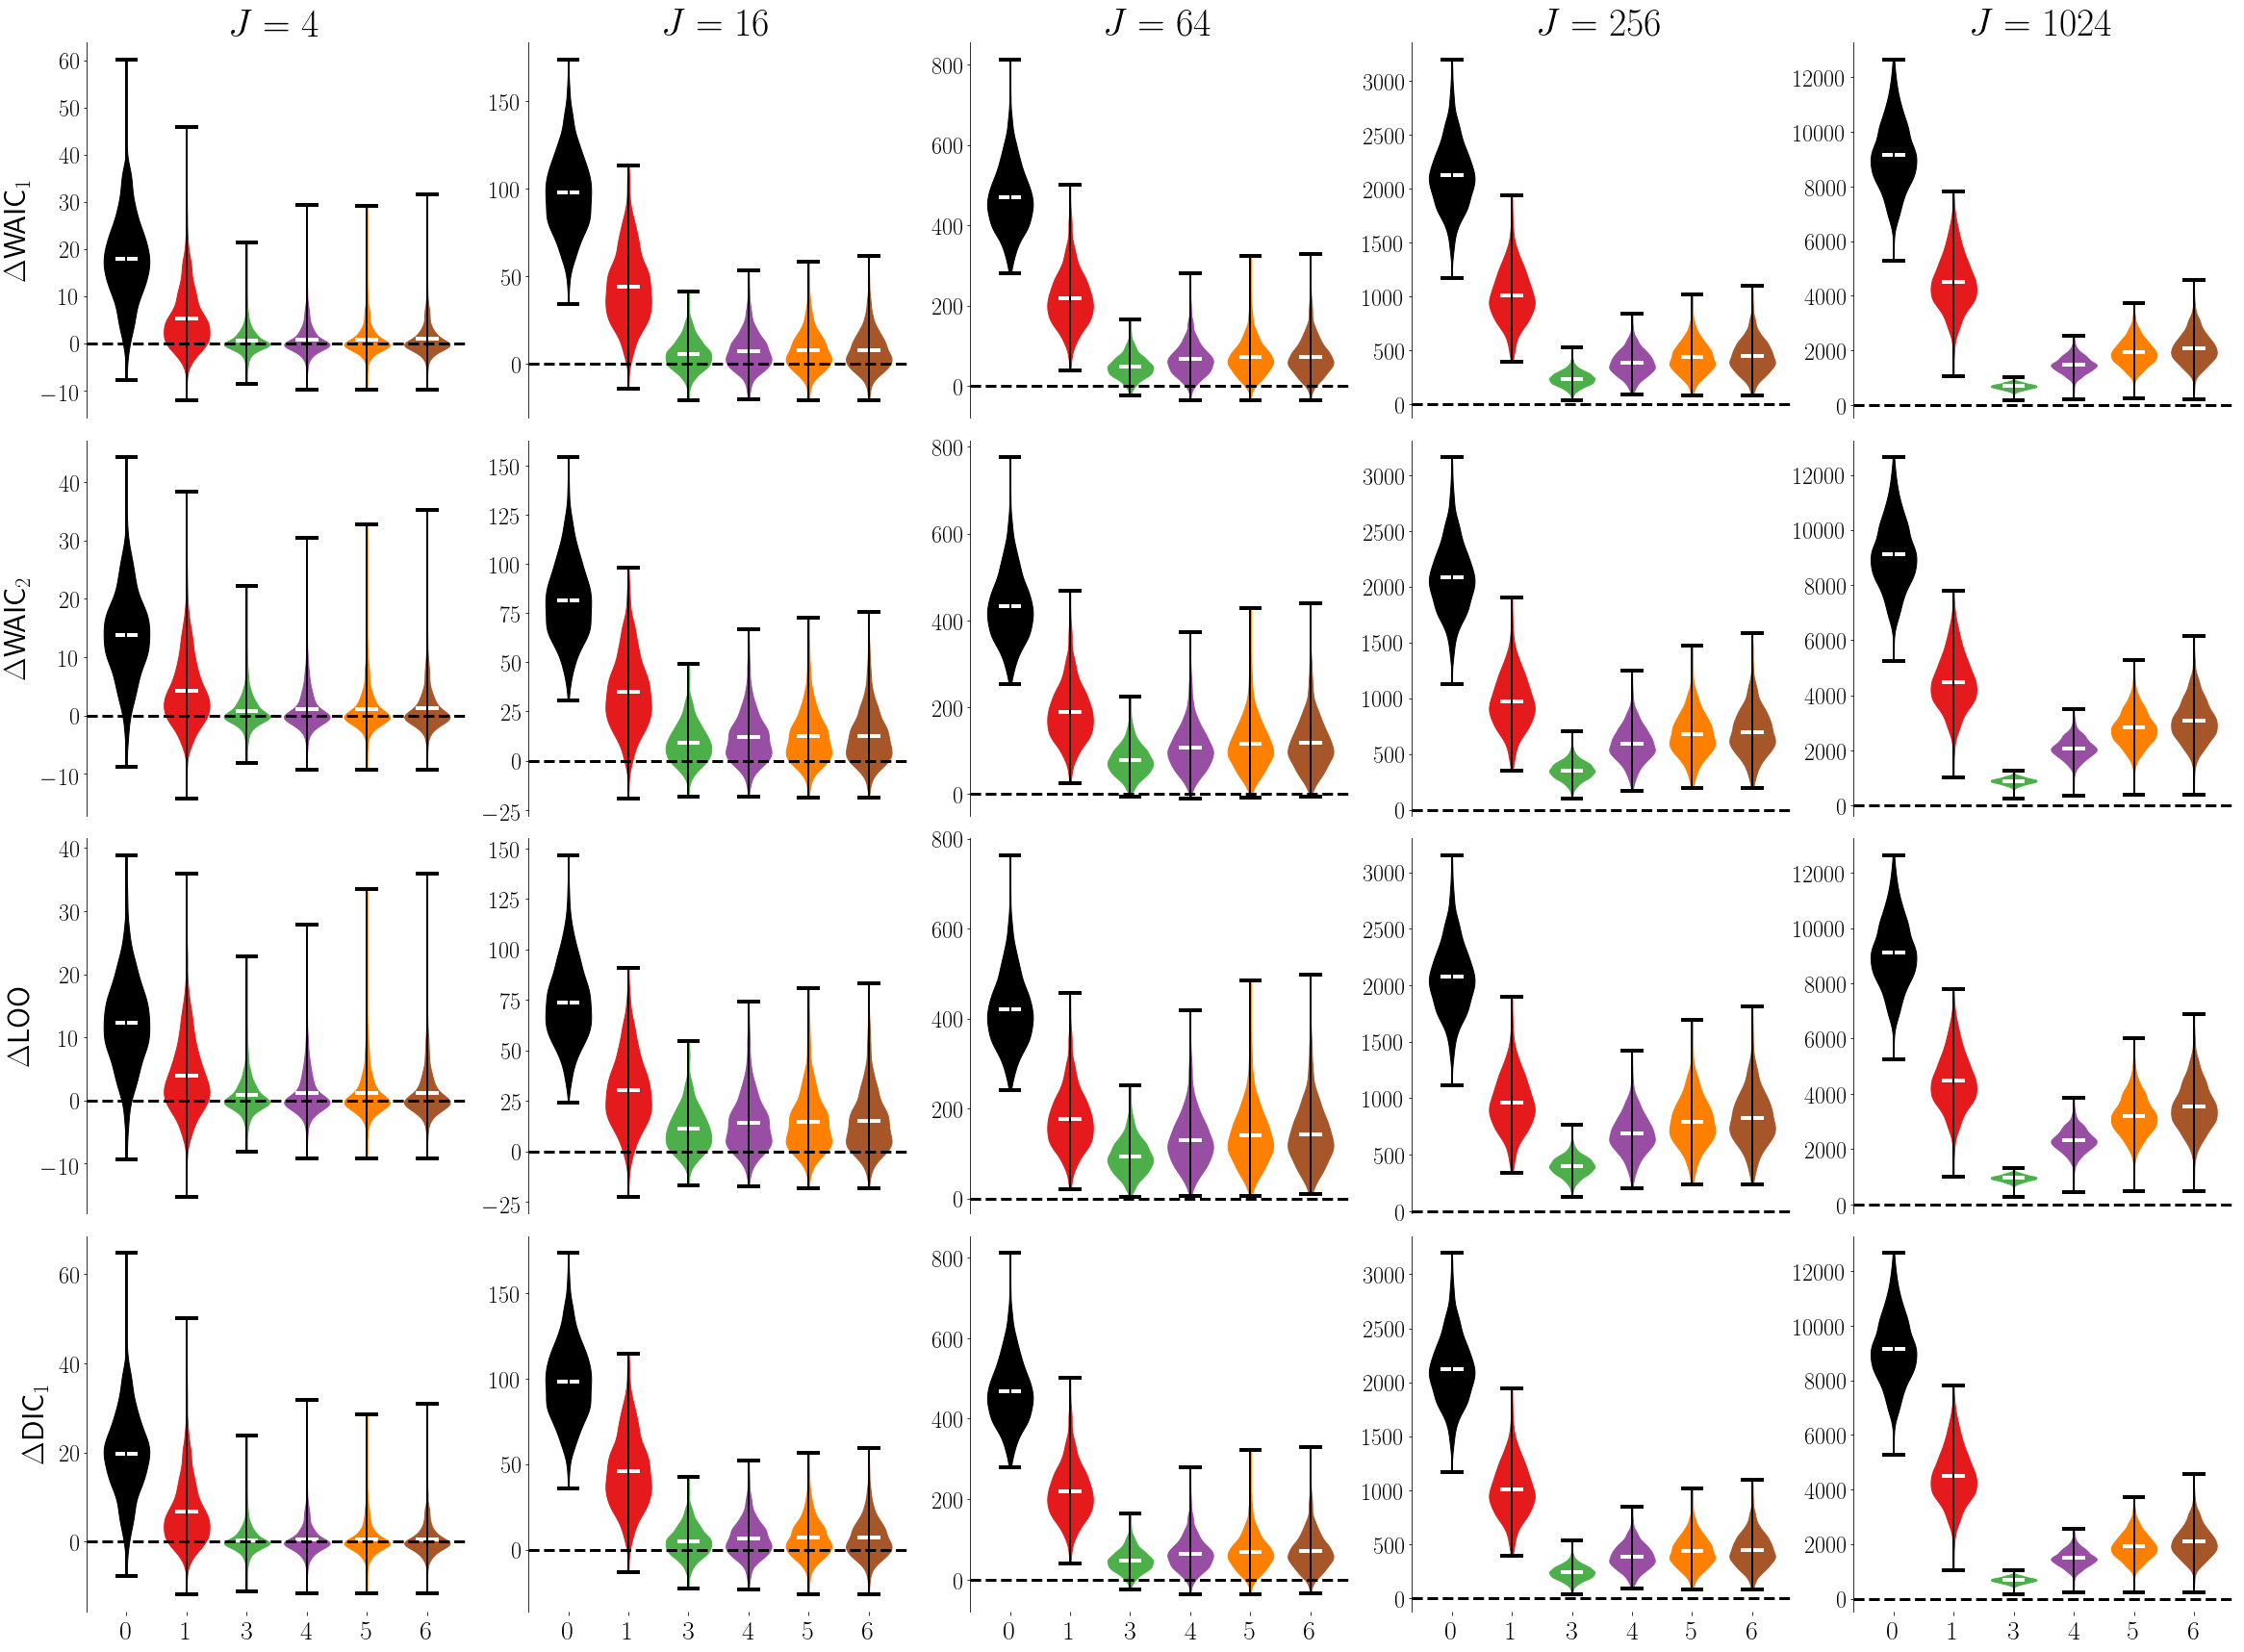

In [40]:
# histograms here
# rows: information
# columns: 2^J samples
fig = plt.figure(figsize=(40,30))
gs0 = gridspec.GridSpec(4,5, hspace = 0.06,wspace=0.16)
ax = []
matplotlib.rcParams.update({'font.size': 24})

N_J = 5

pretty_labels = ['$\Delta$WAIC$_1$','$\Delta$WAIC$_2$','$\Delta$LOO','$\Delta$DIC$_1$']
colors = ['#000000'] + Set1_5.hex_colors + [Set1_7.hex_colors[-1]]

for t,test in enumerate(criteria): # enumerate row-wise
    for J in range(N_J):
        ax+= [plt.Subplot(fig,gs0[t,J])]
        fig.add_subplot(ax[-1])
        plotdata = []
        baseline = testvalues[test][(J,q_true)]
        loc = [0,1,2,3,4,5,6]
        loc.remove(q_true)
        for q in loc:
            tempdat = np.array(testvalues[test][(J,q)])-np.array(baseline)
            plotdata += [tempdat]

        violin_parts = ax[-1].violinplot(plotdata,range(len(loc)), points=100,widths=0.76, showmeans = True)
        violin_parts['cbars'].set_color('k')
        violin_parts['cbars'].set_linewidth(2)
        violin_parts['cmins'].set_color('k')
        violin_parts['cmins'].set_linewidth(4)
        violin_parts['cmaxes'].set_color('k')
        violin_parts['cmaxes'].set_linewidth(4)
        violin_parts['cmeans'].set_color('w')
        violin_parts['cmeans'].set_linewidth(4)
        ax[-1].set_xticks([])
        ax[-1].axhline(y=0,linestyle='--',color='k',linewidth=3)
        ax[-1].spines['top'].set_visible(False)
        ax[-1].spines['right'].set_visible(False)
        ax[-1].spines['bottom'].set_visible(False)

        for l,pc in zip(loc,violin_parts['bodies']):
            pc.set_color(colors[l])
            pc.set_alpha(1)

        
    ax[N_J*t].set_ylabel(pretty_labels[t],fontsize=32)
    
        
for J in range(N_J):
    ax[-(J+1)].set_xticks(range(len(loc)))
    ax[-(J+1)].set_xticklabels(["$" + str(l) + "$" for l in loc],fontsize=28)
    ax[J].set_title("$J=" +str(4**(J+1)) + "$",fontsize=40)
    
#plt.savefig('../figures/fig3.png',bbox_inches='tight', 
#               transparent=True,
#               pad_inches=0.15, dpi=400)
#plt.savefig('../figures/fig3.pdf',bbox_inches='tight', 
#               transparent=True,
#               pad_inches=0.15, dpi=400)
